# SALES PREDICTION USING PYTHON 

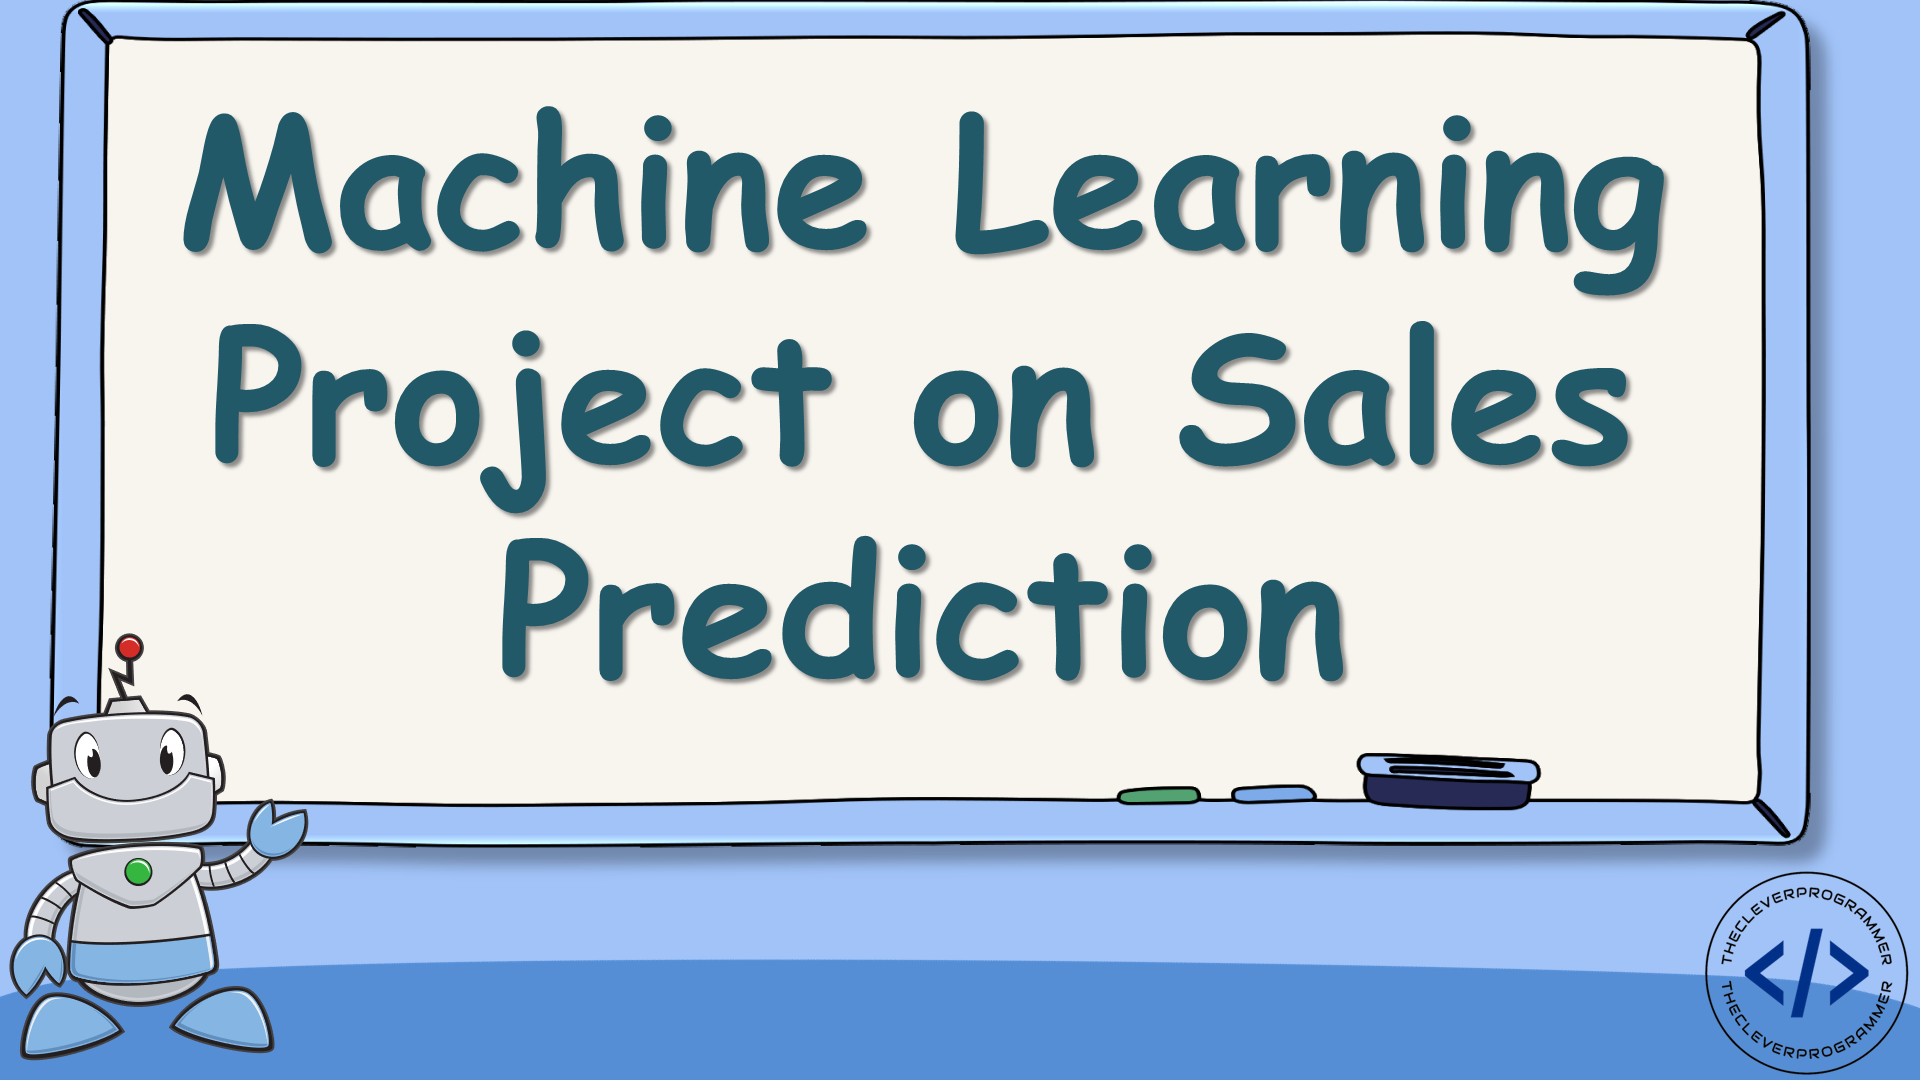

**Import Necessary Libraries**

In [32]:
import numpy as np
import pandas as pd

### Load Dataset 

**dataset is available to kaggle click here to download --**

https://www.kaggle.com/code/pratx557/future-sales-prediction/data

In [33]:
sales = pd.read_csv('Advertising.csv')
sales.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**Drop Un-Necessary Columns** 

In [34]:
sales=sales.drop(columns=['Unnamed: 0'])
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [35]:
sales.shape

(200, 4)

In [63]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [37]:
sales.describe() 

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [38]:
X=sales[['TV','Radio',"Newspaper"]]
y=sales['Sales']

In [39]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [40]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

**train_test_split model**

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=43)

In [42]:
x_train = x_train.astype(int)
y_train = y_train.astype(int)
x_test = x_test.astype(int)
y_test = y_test.astype(int)

In [43]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
x_train_scaled=Sc.fit_transform(x_train)

In [44]:
x_test_scaled=Sc.fit_transform(x_test)

## Train Model

In [45]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [46]:
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [47]:
y_pred=lr.predict(x_test_scaled)
y_pred

array([ 8.07208561, 15.39694276, 11.20723017,  8.7231933 , 10.80138195,
       17.66036561, 23.785389  ,  6.05064595, 22.03934034, 15.92229543,
        7.02529552, 22.70917874, 18.68464752,  4.38385522, 14.34701329,
        9.2970207 , 11.08559493,  9.15049517, 20.67810902,  8.46853177,
       19.98026988, 11.97879363, 12.59404776,  9.52303143, 15.73547183,
        7.12996739, 20.52852873, 19.92139498,  8.37303394, 13.40290607,
       16.65207302, 14.45505255, 16.79013098, 18.58218129, 16.44742571,
       11.99347795, 12.08933433,  5.31167661,  9.13267146, 12.38991849])

In [48]:
from sklearn.metrics import r2_score

In [52]:
import matplotlib.pyplot as plt

In [49]:
r2_score(y_test,y_pred)

0.9222988021105912

**Save Model**

In [74]:
import pickle 
pickle.dump(model2,open('sale_grad.pkl','wb'))

**Data Visualization**

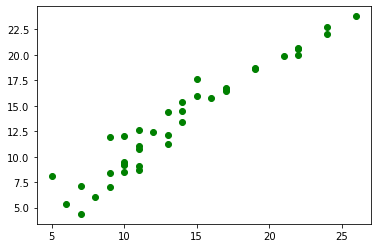

In [62]:
plt.scatter(y_test,y_pred,c='g')

In [55]:
import seaborn as sns

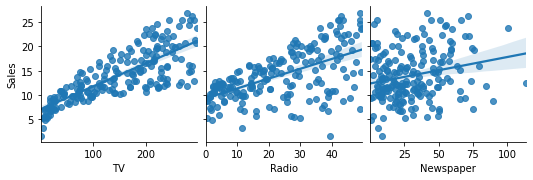

In [57]:
sns.pairplot(sales,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='reg')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


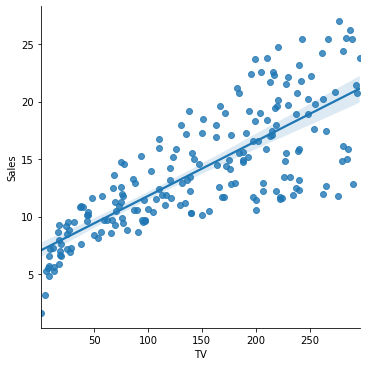

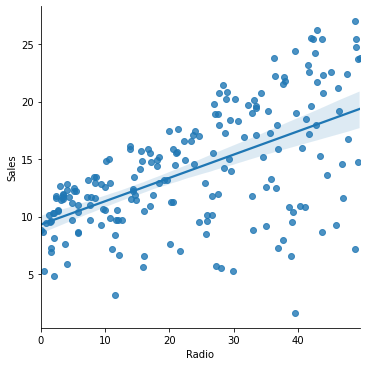

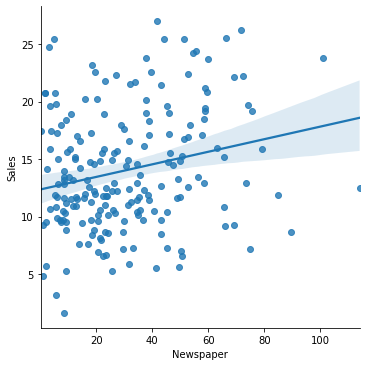

In [58]:
sns.lmplot('TV','Sales',data=sales)
sns.lmplot('Radio','Sales',data=sales)
sns.lmplot('Newspaper','Sales',data=sales)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

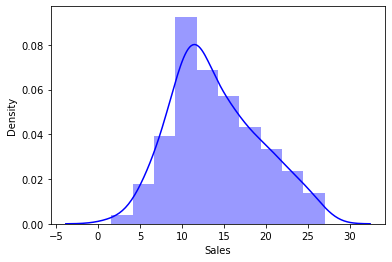

In [59]:
sns.distplot(sales.Sales,bins=10,color="blue",hist=True)

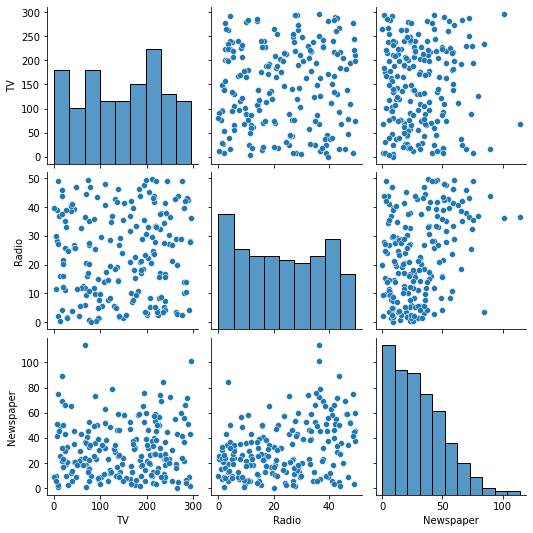

In [65]:
sns.pairplot(sales, vars = ['TV', 'Radio', 'Newspaper']);

**Try to improve the accuracy**

### Gradient Boosting 

In [66]:
from sklearn.ensemble import GradientBoostingRegressor
model2=GradientBoostingRegressor()
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)

**Check Accuracy**

In [68]:
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,y_pred2)
rmse=np.sqrt(mse)
print(rmse)
r2_score=r2_score(y_test,y_pred2)
print(r2_score)

0.6968582560473169
0.983154577087111


In [70]:
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor()
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)

In [72]:
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,y_pred3)
rmse=np.sqrt(mse)
print(rmse)
r2_score=r2_score(y_test,y_pred3)
print(r2_score)

0.7959742458145238
0.9780218541323389


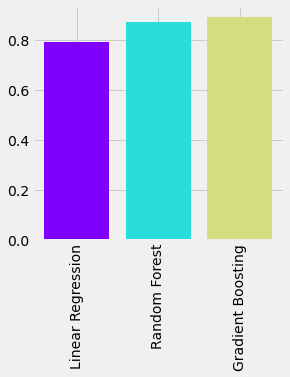

In [73]:
####Comparison of models
r2_score=np.array([.79,.87,.89])
labels=np.array(['Linear Regression','Random Forest','Gradient Boosting'])
index=np.argsort(r2_score)
color=plt.cm.rainbow(np.linspace(0,1,4))

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(4,4)

plt.bar(range(len(index)),r2_score[index],color=color)
plt.xticks(range(0,3),['Linear Regression','Random Forest','Gradient Boosting'],rotation=90)
plt.show() 

# Gradient Boosting 

**More Accurate predict sales**

Thank You ! 
This is my last task so i have completed all task **Oasis-InfoByte Data Science Internship** 
my task-list link provided here click here to download ---
https://github.com/datamind321/Oasis-Infobyte